## Tests of the PowerLaw package for large N (1000, 5000)

https://github.com/jeffalstott/powerlaw

We generate a empirical PowerLaw distribution

$$p(x)\sim\dfrac{1}{x^{\alpha}},\;\;\;\;\alpha=1+\mu$$

 using the numpy Pareto method

https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.pareto.html


and test how well the _PowerLaw.fit(data)_ method works on this data 

We find, as expected from the literature, 

http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0170920

this, the _Clauset-Shalizi-Newman_ estimator, only works well 

for $\mu\in[1.5,3.5]$ and really for large N, of order 5000 or more



In [1]:
import numpy as np
import tensorflow as tf
import pickle, time
from copy import deepcopy
from shutil import copy
from tqdm import tqdm_notebook as tqdm
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
print(np.__version__)
print(sklearn.__version__)

/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.14.2
0.19.1


In [2]:
def get_pareto(mu, M=5000, Q=1):
    W = np.random.pareto(mu,size=(M,int(Q*M)))
    N, M = np.max(W.shape),np.min(W.shape)
    #evals, _ = RMT_Util.eigenspectrum(W)
    
    X = (1/N)*np.dot(W,W.T)
    svd = TruncatedSVD(n_components=M-1, n_iter=7, random_state=42)
    svd.fit(X)  
    evals = svd.singular_values_
    #evals = sv*sv

    return W, evals

In [3]:
data_alphas = []
M=1000
#mus = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,2.0,  2.1, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9 , 3.0, 3.1, 
#       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.5, 5.0, 5.5]
mus=np.sort(3*np.random.random_sample(100)+.5)
for mu in tqdm(mus):
    
    data = np.random.pareto(mu,size=(M))
    
    fit = powerlaw.Fit(data)
    data_alphas.append(fit.alpha)    
    print("data sample: mu+1 {} alpha {}".format(mu+1, fit.alpha))


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


data sample: mu+1 1.5253467541465904 alpha 1.5201562092409968


Calculating best minimal value for power law fit


data sample: mu+1 1.5339881708637164 alpha 1.5577911772218493


Calculating best minimal value for power law fit


data sample: mu+1 1.5684181590110415 alpha 1.5017711872092303


Calculating best minimal value for power law fit


data sample: mu+1 1.5941657858734954 alpha 1.578547770441223


Calculating best minimal value for power law fit


data sample: mu+1 1.7036239695768143 alpha 1.643948321829312


Calculating best minimal value for power law fit


data sample: mu+1 1.7380802722958073 alpha 1.7440152064210865


Calculating best minimal value for power law fit


data sample: mu+1 1.8035101829207987 alpha 2.1434373946256957


Calculating best minimal value for power law fit


data sample: mu+1 1.8230886237335824 alpha 1.7990618265958285


Calculating best minimal value for power law fit


data sample: mu+1 1.8653335985617325 alpha 1.9086483357709638


Calculating best minimal value for power law fit


data sample: mu+1 1.9067736888274365 alpha 1.6690488674693966


Calculating best minimal value for power law fit


data sample: mu+1 1.9659579379432595 alpha 1.7987779311636147


Calculating best minimal value for power law fit


data sample: mu+1 1.9906732787562862 alpha 1.9031406835175495


Calculating best minimal value for power law fit


data sample: mu+1 2.001731338638567 alpha 1.9732028682104066


Calculating best minimal value for power law fit


data sample: mu+1 2.0213783980548556 alpha 1.7715128799420297


Calculating best minimal value for power law fit


data sample: mu+1 2.0383366359352446 alpha 1.8465670319274488


Calculating best minimal value for power law fit


data sample: mu+1 2.0925829765498536 alpha 1.8258182476305467


Calculating best minimal value for power law fit


data sample: mu+1 2.1473936233071456 alpha 2.0006527371579788


Calculating best minimal value for power law fit


data sample: mu+1 2.163628518164896 alpha 1.9786200990224612


Calculating best minimal value for power law fit


data sample: mu+1 2.1651413761905687 alpha 2.0170795485740416


Calculating best minimal value for power law fit


data sample: mu+1 2.1691626450579156 alpha 2.042865463658999


Calculating best minimal value for power law fit


data sample: mu+1 2.1818745029620463 alpha 2.2918233832607298


Calculating best minimal value for power law fit


data sample: mu+1 2.1955315341032957 alpha 2.11855368306714


Calculating best minimal value for power law fit


data sample: mu+1 2.2083030943656086 alpha 2.046381933576445


Calculating best minimal value for power law fit


data sample: mu+1 2.2477491567905497 alpha 2.077139234541276


Calculating best minimal value for power law fit


data sample: mu+1 2.2625298131932703 alpha 2.1031355651965593


Calculating best minimal value for power law fit


data sample: mu+1 2.332698953165533 alpha 2.1708979632001864


Calculating best minimal value for power law fit


data sample: mu+1 2.4296989402981177 alpha 2.1324425592601806


Calculating best minimal value for power law fit


data sample: mu+1 2.449919631878674 alpha 2.1407783070847466


Calculating best minimal value for power law fit


data sample: mu+1 2.4931479721853624 alpha 2.1422388260728207


Calculating best minimal value for power law fit


data sample: mu+1 2.521113725069708 alpha 2.1343131278072196


Calculating best minimal value for power law fit


data sample: mu+1 2.5283757320553417 alpha 2.175649014180044


Calculating best minimal value for power law fit


data sample: mu+1 2.530732789731629 alpha 2.008122005104655


Calculating best minimal value for power law fit


data sample: mu+1 2.595910106827575 alpha 2.222721354426395


Calculating best minimal value for power law fit


data sample: mu+1 2.5973044553620444 alpha 2.30338412705279


Calculating best minimal value for power law fit


data sample: mu+1 2.6308559945402874 alpha 2.5368599274084103


Calculating best minimal value for power law fit


data sample: mu+1 2.645413946168564 alpha 2.1237670503611596


Calculating best minimal value for power law fit


data sample: mu+1 2.7017836698389077 alpha 2.3015818499614262


Calculating best minimal value for power law fit


data sample: mu+1 2.734888664621569 alpha 2.118242757133949


Calculating best minimal value for power law fit


data sample: mu+1 2.749290510212644 alpha 2.1939335516969383


Calculating best minimal value for power law fit


data sample: mu+1 2.766679731582394 alpha 3.095426735110358


Calculating best minimal value for power law fit


data sample: mu+1 2.785814944726856 alpha 2.3557010865389802


Calculating best minimal value for power law fit


data sample: mu+1 2.7954276037155523 alpha 2.6148391476374977


Calculating best minimal value for power law fit


data sample: mu+1 2.808295755309365 alpha 2.241140997593061


Calculating best minimal value for power law fit


data sample: mu+1 2.842929397226526 alpha 2.0030174703279986


Calculating best minimal value for power law fit


data sample: mu+1 2.890900320890148 alpha 2.5320695502408603


Calculating best minimal value for power law fit


data sample: mu+1 2.8980943733154088 alpha 2.7791043286563815


Calculating best minimal value for power law fit


data sample: mu+1 2.950627001527425 alpha 2.5161823362554356


Calculating best minimal value for power law fit


data sample: mu+1 3.0069988177053855 alpha 2.5229711189445165


Calculating best minimal value for power law fit


data sample: mu+1 3.0286212867624944 alpha 2.601425457135227


Calculating best minimal value for power law fit


data sample: mu+1 3.0490861135897256 alpha 2.255600527202192


Calculating best minimal value for power law fit


data sample: mu+1 3.0514807900111762 alpha 2.928849488488603


Calculating best minimal value for power law fit


data sample: mu+1 3.0824156817525346 alpha 2.3054496799277366


Calculating best minimal value for power law fit


data sample: mu+1 3.113095833368644 alpha 2.60079849716682


Calculating best minimal value for power law fit


data sample: mu+1 3.156308489632096 alpha 2.809400267483465


Calculating best minimal value for power law fit


data sample: mu+1 3.158490837708582 alpha 2.562490414114895


Calculating best minimal value for power law fit


data sample: mu+1 3.214055671158138 alpha 2.402440404223756


Calculating best minimal value for power law fit


data sample: mu+1 3.2340903176828197 alpha 2.64126644072655


Calculating best minimal value for power law fit


data sample: mu+1 3.2517622749977924 alpha 2.878390024864441


Calculating best minimal value for power law fit


data sample: mu+1 3.260439951383759 alpha 2.8339196505929376


Calculating best minimal value for power law fit


data sample: mu+1 3.268411589756883 alpha 2.6271515643925545


Calculating best minimal value for power law fit


data sample: mu+1 3.274893506909943 alpha 3.859523862729182


Calculating best minimal value for power law fit


data sample: mu+1 3.3229377168805874 alpha 2.7565606078868514


Calculating best minimal value for power law fit


data sample: mu+1 3.3519211472117485 alpha 2.2715313502753016


Calculating best minimal value for power law fit


data sample: mu+1 3.357493676086145 alpha 2.3013711836828676


Calculating best minimal value for power law fit


data sample: mu+1 3.3737820699137586 alpha 2.48870448138749


Calculating best minimal value for power law fit


data sample: mu+1 3.437022134936851 alpha 2.5443644390140374


Calculating best minimal value for power law fit


data sample: mu+1 3.4386750589232435 alpha 2.4921383457930197


Calculating best minimal value for power law fit


data sample: mu+1 3.484522305462149 alpha 2.857077402445907


Calculating best minimal value for power law fit


data sample: mu+1 3.498940434384458 alpha 3.227832808256315


Calculating best minimal value for power law fit


data sample: mu+1 3.511999037953056 alpha 2.896891816682904


Calculating best minimal value for power law fit


data sample: mu+1 3.5341250283212227 alpha 2.8050396746123827


Calculating best minimal value for power law fit


data sample: mu+1 3.6075604995150847 alpha 3.422194113759475


Calculating best minimal value for power law fit


data sample: mu+1 3.6123069496836258 alpha 2.750556640037124


Calculating best minimal value for power law fit


data sample: mu+1 3.674277544958671 alpha 2.551079512324047


Calculating best minimal value for power law fit


data sample: mu+1 3.6762309618868385 alpha 2.439664745309165


Calculating best minimal value for power law fit


data sample: mu+1 3.6781482726723445 alpha 3.3654756646573327


Calculating best minimal value for power law fit


data sample: mu+1 3.7010814624708783 alpha 2.5013674561478414


Calculating best minimal value for power law fit


data sample: mu+1 3.7120279204129405 alpha 2.531453409080566


Calculating best minimal value for power law fit


data sample: mu+1 3.7258061046578996 alpha 2.972369374090385


Calculating best minimal value for power law fit


data sample: mu+1 3.7878369662963998 alpha 2.923461670066226


Calculating best minimal value for power law fit


data sample: mu+1 3.861586390225364 alpha 2.8847235786704912


Calculating best minimal value for power law fit


data sample: mu+1 3.8950243812234784 alpha 3.4549503591430537


Calculating best minimal value for power law fit


data sample: mu+1 3.901438139631874 alpha 2.9716656202871516


Calculating best minimal value for power law fit


data sample: mu+1 3.9030769827643113 alpha 3.1708750121659106


Calculating best minimal value for power law fit


data sample: mu+1 3.9206838553970904 alpha 2.647414830290489


Calculating best minimal value for power law fit


data sample: mu+1 3.9411648464936633 alpha 2.558052170266871


Calculating best minimal value for power law fit


data sample: mu+1 4.033379036543615 alpha 2.8954374445469266


Calculating best minimal value for power law fit


data sample: mu+1 4.037473868711566 alpha 2.5062224729641107


Calculating best minimal value for power law fit


data sample: mu+1 4.075174269689864 alpha 3.369237559221706


Calculating best minimal value for power law fit


data sample: mu+1 4.107966895580606 alpha 2.528098094372604


Calculating best minimal value for power law fit


data sample: mu+1 4.139754565816537 alpha 2.5139418889737852


Calculating best minimal value for power law fit


data sample: mu+1 4.178398189242042 alpha 2.600911718250117


Calculating best minimal value for power law fit


data sample: mu+1 4.191513164272639 alpha 2.7512935664979428


Calculating best minimal value for power law fit


data sample: mu+1 4.244255040626495 alpha 2.939347783926018


Calculating best minimal value for power law fit


data sample: mu+1 4.311208830085786 alpha 2.672031686542845


Calculating best minimal value for power law fit


data sample: mu+1 4.3434085823237805 alpha 3.464915483845866


Calculating best minimal value for power law fit


data sample: mu+1 4.39118526457948 alpha 2.9176093985052196


Calculating best minimal value for power law fit


data sample: mu+1 4.434271333710475 alpha 2.487865818097975


Calculating best minimal value for power law fit


data sample: mu+1 4.4400189761166216 alpha 2.9581305989537308


Calculating best minimal value for power law fit


data sample: mu+1 4.451055181969007 alpha 2.8188429854185992



In [4]:
mup1 = np.array(mus)+1.0

### This plot should be a straight line

Text(0.5,1,'PowerLaw Test: fit vs actual')

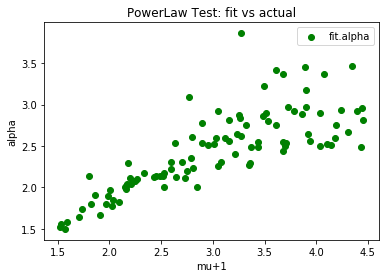

In [5]:
plt.scatter(mup1, data_alphas, color='green', label='fit.alpha')
plt.xlabel("mu+1")
plt.ylabel('alpha')
plt.legend()
plt.title("PowerLaw Test: fit vs actual")



In [6]:
data_alphas5k = []
M=5000
mus=np.sort(3*np.random.random_sample(100)+.5)
for mu in tqdm(mus):
    
    data = np.random.pareto(mu,size=(M))
    
    fit = powerlaw.Fit(data, xmax=np.max(data))
    data_alphas5k.append(fit.alpha)    
    print("data sample: mu+1 {} alpha {}".format(mu+1, fit.alpha))



Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


data sample: mu+1 1.5225460153202397 alpha 1.515931182990634


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:1175: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:822: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C
Calculating best minimal value for power law fit


data sample: mu+1 1.5325249231462794 alpha 1.5464911706494595
data sample: mu+1 1.5539652722068893 alpha 1.5332052687902054


Calculating best minimal value for power law fit


data sample: mu+1 1.606978349787021 alpha 1.633460421506082


Calculating best minimal value for power law fit


data sample: mu+1 1.6132514699563432 alpha 1.5877227690330993


Calculating best minimal value for power law fit


data sample: mu+1 1.637760067154281 alpha 1.6154100042643726


Calculating best minimal value for power law fit


data sample: mu+1 1.6549806810567107 alpha 1.6507994912859045


Calculating best minimal value for power law fit


data sample: mu+1 1.6814755328371098 alpha 1.6881671915913086


Calculating best minimal value for power law fit


data sample: mu+1 1.7215604749693743 alpha 1.66506392650673


Calculating best minimal value for power law fit


data sample: mu+1 1.7685865906777827 alpha 1.7578373300963441


Calculating best minimal value for power law fit


data sample: mu+1 1.781308769986833 alpha 1.7124624127374752


Calculating best minimal value for power law fit


data sample: mu+1 1.8162283508946473 alpha 1.786583592373849


Calculating best minimal value for power law fit


data sample: mu+1 1.8188506996439142 alpha 1.8188783147899985


Calculating best minimal value for power law fit


data sample: mu+1 1.8232063124693707 alpha 1.848454926408174


Calculating best minimal value for power law fit


data sample: mu+1 1.8397681110587802 alpha 1.824288797769007


Calculating best minimal value for power law fit


data sample: mu+1 1.8455771734343585 alpha 1.835487930398226


Calculating best minimal value for power law fit


data sample: mu+1 1.8498311478338716 alpha 1.7995537330749776


Calculating best minimal value for power law fit


data sample: mu+1 1.8732161769286702 alpha 1.8239734094345899


Calculating best minimal value for power law fit


data sample: mu+1 1.9298612379141156 alpha 1.8655760346217871


Calculating best minimal value for power law fit


data sample: mu+1 2.0567465791968975 alpha 2.003365955590574


Calculating best minimal value for power law fit


data sample: mu+1 2.105059560221637 alpha 1.8952499198862969


Calculating best minimal value for power law fit


data sample: mu+1 2.1211018008269833 alpha 2.087307744932261


Calculating best minimal value for power law fit


data sample: mu+1 2.1574851904555232 alpha 2.023144451704061


Calculating best minimal value for power law fit


data sample: mu+1 2.1861684108748056 alpha 2.1375035316299567


Calculating best minimal value for power law fit


data sample: mu+1 2.2364279567050556 alpha 2.065640395718246


Calculating best minimal value for power law fit


data sample: mu+1 2.252816514080907 alpha 2.0445656892408564


Calculating best minimal value for power law fit


data sample: mu+1 2.26560926186181 alpha 2.0747730505754562


Calculating best minimal value for power law fit


data sample: mu+1 2.2966779337069165 alpha 2.463614970509335


Calculating best minimal value for power law fit


data sample: mu+1 2.3459934291461435 alpha 2.1428072864139125


Calculating best minimal value for power law fit


data sample: mu+1 2.350434121903565 alpha 2.391851288116869


Calculating best minimal value for power law fit


data sample: mu+1 2.4073728294584913 alpha 2.123059184184383


Calculating best minimal value for power law fit


data sample: mu+1 2.4139090863972146 alpha 2.171562412486204


Calculating best minimal value for power law fit


data sample: mu+1 2.4285405557285014 alpha 2.216480567711701


Calculating best minimal value for power law fit


data sample: mu+1 2.4908526323689477 alpha 2.149296414783999


Calculating best minimal value for power law fit


data sample: mu+1 2.5059750407149712 alpha 2.324543165241128


Calculating best minimal value for power law fit


data sample: mu+1 2.540692597539964 alpha 2.3889275855059644


Calculating best minimal value for power law fit


data sample: mu+1 2.5666158419954237 alpha 2.142525882624977


Calculating best minimal value for power law fit


data sample: mu+1 2.615693569108439 alpha 2.6451252818267523


Calculating best minimal value for power law fit


data sample: mu+1 2.621332854880864 alpha 2.464333728383582


Calculating best minimal value for power law fit


data sample: mu+1 2.6739067821366604 alpha 2.4476905963575963


Calculating best minimal value for power law fit


data sample: mu+1 2.775332874949825 alpha 2.5579976964855176


Calculating best minimal value for power law fit


data sample: mu+1 2.8606986161299246 alpha 2.3829434525317095


Calculating best minimal value for power law fit


data sample: mu+1 2.916555034748523 alpha 2.6272743401421375


Calculating best minimal value for power law fit


data sample: mu+1 2.919221361491336 alpha 2.7911100456892197


Calculating best minimal value for power law fit


data sample: mu+1 2.971813109695981 alpha 2.539693299761864


Calculating best minimal value for power law fit


data sample: mu+1 2.9721507691088505 alpha 2.668970056742202


Calculating best minimal value for power law fit


data sample: mu+1 2.9740297190318823 alpha 2.5047682525460035


Calculating best minimal value for power law fit


data sample: mu+1 3.055371827810253 alpha 2.666482376729289


Calculating best minimal value for power law fit


data sample: mu+1 3.065239104184038 alpha 2.566966639000161


Calculating best minimal value for power law fit


data sample: mu+1 3.0759160010808686 alpha 3.0991034081476174


Calculating best minimal value for power law fit


data sample: mu+1 3.080134149423139 alpha 2.8134074191126732


Calculating best minimal value for power law fit


data sample: mu+1 3.0880609204793874 alpha 2.5834437645222312


Calculating best minimal value for power law fit


data sample: mu+1 3.091453881195414 alpha 3.056302767868977


Calculating best minimal value for power law fit


data sample: mu+1 3.097584200747053 alpha 2.4050462495256912


Calculating best minimal value for power law fit


data sample: mu+1 3.1033204066475966 alpha 2.6035586873023835


Calculating best minimal value for power law fit


data sample: mu+1 3.138442789950515 alpha 2.5470405468658


Calculating best minimal value for power law fit


data sample: mu+1 3.208464847861153 alpha 2.8140562250158547


Calculating best minimal value for power law fit


data sample: mu+1 3.2142167246360156 alpha 2.550245312424903


Calculating best minimal value for power law fit


data sample: mu+1 3.215161708256257 alpha 2.789710878576802


Calculating best minimal value for power law fit


data sample: mu+1 3.2208145517134437 alpha 2.513926460713428


Calculating best minimal value for power law fit


data sample: mu+1 3.2676151245284077 alpha 2.4609339814690934


Calculating best minimal value for power law fit


data sample: mu+1 3.3027174128471004 alpha 2.60642815789424


Calculating best minimal value for power law fit


data sample: mu+1 3.3210302730903214 alpha 3.214850484832197


Calculating best minimal value for power law fit


data sample: mu+1 3.3822484714796412 alpha 2.8598914314815618


Calculating best minimal value for power law fit


data sample: mu+1 3.4151492272019137 alpha 2.9329855525732937


Calculating best minimal value for power law fit


data sample: mu+1 3.4407866822926856 alpha 2.9972632163229376


Calculating best minimal value for power law fit


data sample: mu+1 3.4456131683121347 alpha 2.908401892957257


Calculating best minimal value for power law fit


data sample: mu+1 3.470655874945101 alpha 3.1402187655160456


Calculating best minimal value for power law fit


data sample: mu+1 3.515983516056848 alpha 3.066778539858092


Calculating best minimal value for power law fit


data sample: mu+1 3.526078329337696 alpha 3.0596038661120493


Calculating best minimal value for power law fit


data sample: mu+1 3.543938589452427 alpha 3.346652806969957


Calculating best minimal value for power law fit


data sample: mu+1 3.544740545904994 alpha 2.951945129460385


Calculating best minimal value for power law fit


data sample: mu+1 3.567298050933201 alpha 3.0826968334204343


Calculating best minimal value for power law fit


data sample: mu+1 3.5798094761873744 alpha 2.9783602429362954


Calculating best minimal value for power law fit


data sample: mu+1 3.592600038138581 alpha 3.422556751539184


Calculating best minimal value for power law fit


data sample: mu+1 3.649360000279465 alpha 3.1624229062511775


Calculating best minimal value for power law fit


data sample: mu+1 3.6876747677158805 alpha 2.748784169272076


Calculating best minimal value for power law fit


data sample: mu+1 3.7038984996317508 alpha 3.2050537521823754


Calculating best minimal value for power law fit


data sample: mu+1 3.737320403673528 alpha 2.893390585232854


Calculating best minimal value for power law fit


data sample: mu+1 3.7830599578730437 alpha 3.11485141917704


Calculating best minimal value for power law fit


data sample: mu+1 3.7938568889390254 alpha 2.803097510777516


Calculating best minimal value for power law fit


data sample: mu+1 3.8039773260902123 alpha 3.039006815090768


Calculating best minimal value for power law fit


data sample: mu+1 3.826972418727313 alpha 2.9876507545479667


Calculating best minimal value for power law fit


data sample: mu+1 3.8355128612775062 alpha 3.1462874214267984


Calculating best minimal value for power law fit


data sample: mu+1 3.841413351771315 alpha 3.0269798560556023


Calculating best minimal value for power law fit


data sample: mu+1 3.8649803511380356 alpha 2.837596306331771


Calculating best minimal value for power law fit


data sample: mu+1 3.890298486678627 alpha 2.987595107923151


Calculating best minimal value for power law fit


data sample: mu+1 3.9267558606642985 alpha 2.9245935626143016


Calculating best minimal value for power law fit


data sample: mu+1 3.98673598823215 alpha 3.0507835131510554


Calculating best minimal value for power law fit


data sample: mu+1 4.023559685054435 alpha 3.2117304208264303


Calculating best minimal value for power law fit


data sample: mu+1 4.1056372402011405 alpha 2.770240442574036


Calculating best minimal value for power law fit


data sample: mu+1 4.118054120908574 alpha 2.8851943031675145


Calculating best minimal value for power law fit


data sample: mu+1 4.1194255340507215 alpha 3.4176108773668297


Calculating best minimal value for power law fit


data sample: mu+1 4.1408838507556265 alpha 3.5289238852641125


Calculating best minimal value for power law fit


data sample: mu+1 4.163223752445127 alpha 3.3075503867794693


Calculating best minimal value for power law fit


data sample: mu+1 4.163874879258564 alpha 3.729703048964667


Calculating best minimal value for power law fit


data sample: mu+1 4.212663544414928 alpha 2.8675172364231827


Calculating best minimal value for power law fit


data sample: mu+1 4.226871736048526 alpha 2.808164288304651


Calculating best minimal value for power law fit


data sample: mu+1 4.322530095077836 alpha 3.3384090918664993


Calculating best minimal value for power law fit


data sample: mu+1 4.452948544541012 alpha 3.088247448331082



Text(0.5,1,'PowerLaw Test (w/xmax): fit vs actual')

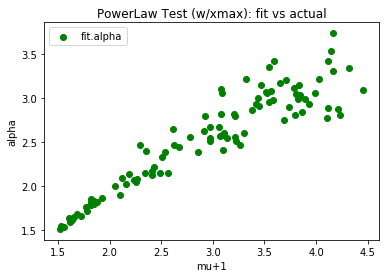

In [7]:
mup1 = np.array(mus)+1.0

plt.scatter(mup1[0:len(data_alphas5k)], data_alphas5k, color='green', label='fit.alpha')
plt.xlabel("mu+1")
plt.ylabel('alpha')
plt.legend()
plt.title("PowerLaw Test (w/xmax): fit vs actual")

### Try KS method instead of Maximum Likeliehood

In [8]:
data_alphas1k = []
M=1000
mus=np.sort(3*np.random.random_sample(100)+.5)
for mu in tqdm(mus):
    
    data = np.random.pareto(mu,size=(M))
    
    fit = powerlaw.Fit(data, xmax=np.max(data), fit_method="KS")
    data_alphas1k.append(fit.alpha)    
    print("data sample: mu+1 {} alpha {}".format(mu+1, fit.alpha))


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:697: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


data sample: mu+1 1.5076815184908532 alpha 1.452288597166365


Calculating best minimal value for power law fit
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/powerlaw.py:698: RuntimeWarning: overflow encountered in double_scalars
  )[1:]


data sample: mu+1 1.5673429294443695 alpha 1.508744340332073


Calculating best minimal value for power law fit


data sample: mu+1 1.5929705318469687 alpha 1.5314325131486115


Calculating best minimal value for power law fit


data sample: mu+1 1.6585626005200083 alpha 1.6546032337844698


Calculating best minimal value for power law fit


data sample: mu+1 1.6680761679478437 alpha 1.596527536675505


Calculating best minimal value for power law fit


data sample: mu+1 1.675646680221387 alpha 1.734030848238364


Calculating best minimal value for power law fit


data sample: mu+1 1.6840748272148174 alpha 1.6473188757438515


Calculating best minimal value for power law fit


data sample: mu+1 1.718885442553748 alpha 1.7189688158887164


Calculating best minimal value for power law fit


data sample: mu+1 1.7472408562058632 alpha 1.6997707716408048


Calculating best minimal value for power law fit


data sample: mu+1 1.774850458683769 alpha 1.691507865058849


Calculating best minimal value for power law fit


data sample: mu+1 1.8316835535327143 alpha 1.7672655313289218


Calculating best minimal value for power law fit


data sample: mu+1 1.8528899294870516 alpha 1.7345636529579342


Calculating best minimal value for power law fit


data sample: mu+1 1.933268944061576 alpha 1.9373876250987687


Calculating best minimal value for power law fit


data sample: mu+1 1.9483707445498553 alpha 1.8238740098192916


Calculating best minimal value for power law fit


data sample: mu+1 1.9563938311375115 alpha 1.740880616384854


Calculating best minimal value for power law fit


data sample: mu+1 1.9805950418879257 alpha 1.721167327798356


Calculating best minimal value for power law fit


data sample: mu+1 2.0347846295558867 alpha 1.8344509478941387


Calculating best minimal value for power law fit


data sample: mu+1 2.0844455064818503 alpha 1.786856359203652


Calculating best minimal value for power law fit


data sample: mu+1 2.1088643586846585 alpha 2.0708297983959354


Calculating best minimal value for power law fit


data sample: mu+1 2.130496017187812 alpha 1.8853154685232365


Calculating best minimal value for power law fit


data sample: mu+1 2.190452183660819 alpha 2.0118441668943743


Calculating best minimal value for power law fit


data sample: mu+1 2.3065580435807864 alpha 1.9630934855519142


Calculating best minimal value for power law fit


data sample: mu+1 2.322358478319443 alpha 2.182973818336552


Calculating best minimal value for power law fit


data sample: mu+1 2.3265737714025168 alpha 1.9653702718789117


Calculating best minimal value for power law fit


data sample: mu+1 2.3457998851375415 alpha 2.302157699377248


Calculating best minimal value for power law fit


data sample: mu+1 2.3971691780341198 alpha 2.1898962936747255


Calculating best minimal value for power law fit


data sample: mu+1 2.4088678939204584 alpha 2.0625138277847186


Calculating best minimal value for power law fit


data sample: mu+1 2.4106686958404526 alpha 2.0210867499339242


Calculating best minimal value for power law fit


data sample: mu+1 2.4845921410239313 alpha 2.2373713608076056


Calculating best minimal value for power law fit


data sample: mu+1 2.485042880855022 alpha 2.1441154257249586


Calculating best minimal value for power law fit


data sample: mu+1 2.488987074435031 alpha 2.2001347428851505


Calculating best minimal value for power law fit


data sample: mu+1 2.5718446911329993 alpha 2.1667017205295753


Calculating best minimal value for power law fit


data sample: mu+1 2.612538691005926 alpha 2.022111036147545


Calculating best minimal value for power law fit


data sample: mu+1 2.6400204437956996 alpha 2.192289517801882


Calculating best minimal value for power law fit


data sample: mu+1 2.671772408339908 alpha 2.163117775869871


Calculating best minimal value for power law fit


data sample: mu+1 2.6816686853796603 alpha 2.397690967138998


Calculating best minimal value for power law fit


data sample: mu+1 2.7271054475043646 alpha 2.138414280747619


Calculating best minimal value for power law fit


data sample: mu+1 2.7310805980491293 alpha 2.349213561659588


Calculating best minimal value for power law fit


data sample: mu+1 2.7684852834896843 alpha 2.231614097406067


Calculating best minimal value for power law fit


data sample: mu+1 2.7810417743046614 alpha 2.242109582101279


Calculating best minimal value for power law fit


data sample: mu+1 2.787667702668281 alpha 2.2510383214736915


Calculating best minimal value for power law fit


data sample: mu+1 2.914472685279275 alpha 2.360232322861642


Calculating best minimal value for power law fit


data sample: mu+1 2.9168035863702446 alpha 2.2575601558409595


Calculating best minimal value for power law fit


data sample: mu+1 2.9177668933353496 alpha 2.1038680995570607


Calculating best minimal value for power law fit


data sample: mu+1 2.966492871363024 alpha 2.2695646277349084


Calculating best minimal value for power law fit


data sample: mu+1 3.0307688679957154 alpha 2.504189628398971


Calculating best minimal value for power law fit


data sample: mu+1 3.0407729013042495 alpha 2.491590035583034


Calculating best minimal value for power law fit


data sample: mu+1 3.069722501115219 alpha 2.334333107155793


Calculating best minimal value for power law fit


data sample: mu+1 3.1148649252195337 alpha 2.44606086829938


Calculating best minimal value for power law fit


data sample: mu+1 3.208225152634565 alpha 2.040646604549374


Calculating best minimal value for power law fit


data sample: mu+1 3.2101398347419483 alpha 2.5063770841573008


Calculating best minimal value for power law fit


data sample: mu+1 3.238532549181329 alpha 2.6136158599957513


Calculating best minimal value for power law fit


data sample: mu+1 3.2394981119273405 alpha 2.50158502565115


Calculating best minimal value for power law fit


data sample: mu+1 3.2688334209076126 alpha 2.4887137902448306


Calculating best minimal value for power law fit


data sample: mu+1 3.314474424756612 alpha 2.065370627932951


Calculating best minimal value for power law fit


data sample: mu+1 3.3383642197008823 alpha 2.4374633920065474


Calculating best minimal value for power law fit


data sample: mu+1 3.345048889774506 alpha 2.229934291857452


Calculating best minimal value for power law fit


data sample: mu+1 3.373189782108893 alpha 2.5613594644289828


Calculating best minimal value for power law fit


data sample: mu+1 3.379910480501308 alpha 2.9019811016316237


Calculating best minimal value for power law fit


data sample: mu+1 3.488637836261734 alpha 2.734569775546095


Calculating best minimal value for power law fit


data sample: mu+1 3.529573623360907 alpha 2.365782388692157


Calculating best minimal value for power law fit


data sample: mu+1 3.560347667781158 alpha 2.410070762099012


Calculating best minimal value for power law fit


data sample: mu+1 3.5783096449895697 alpha 2.266619351337323


Calculating best minimal value for power law fit


data sample: mu+1 3.5833987810530012 alpha 2.8926999801592688


Calculating best minimal value for power law fit


data sample: mu+1 3.608953828479036 alpha 2.399908715325748


Calculating best minimal value for power law fit


data sample: mu+1 3.6168818032517756 alpha 3.1102064788730948


Calculating best minimal value for power law fit


data sample: mu+1 3.617956961039144 alpha 2.4266403795570968


Calculating best minimal value for power law fit


data sample: mu+1 3.646188202025778 alpha 2.423324388616212


Calculating best minimal value for power law fit


data sample: mu+1 3.6639249572487746 alpha 2.0997736441535766


Calculating best minimal value for power law fit


data sample: mu+1 3.6982690904163107 alpha 2.681693383361056


Calculating best minimal value for power law fit


data sample: mu+1 3.7020852739952255 alpha 2.7002973458355184


Calculating best minimal value for power law fit


data sample: mu+1 3.7628903392290907 alpha 2.25282702139942


Calculating best minimal value for power law fit


data sample: mu+1 3.7657587513057718 alpha 2.338267825091893


Calculating best minimal value for power law fit


data sample: mu+1 3.865067461513646 alpha 2.267213477668883


Calculating best minimal value for power law fit


data sample: mu+1 3.871420761447253 alpha 2.5817557580960653


Calculating best minimal value for power law fit


data sample: mu+1 3.9002660292145723 alpha 2.092590641313155


Calculating best minimal value for power law fit


data sample: mu+1 3.9289025437628093 alpha 2.6805027808286535


Calculating best minimal value for power law fit


data sample: mu+1 3.9454220387972665 alpha 2.511990188909106


Calculating best minimal value for power law fit


data sample: mu+1 3.9838043775116505 alpha 2.5005373979581496


Calculating best minimal value for power law fit


data sample: mu+1 4.033744897834396 alpha 2.8561370504500814


Calculating best minimal value for power law fit


data sample: mu+1 4.072412515793143 alpha 2.7838412216083617


Calculating best minimal value for power law fit


data sample: mu+1 4.159439539275463 alpha 3.3376979858234246


Calculating best minimal value for power law fit


data sample: mu+1 4.1767872754357 alpha 2.556060934364606


Calculating best minimal value for power law fit


data sample: mu+1 4.205465581018626 alpha 2.446653044534247


Calculating best minimal value for power law fit


data sample: mu+1 4.206404126410209 alpha 2.7812286735230973


Calculating best minimal value for power law fit


data sample: mu+1 4.241456620958899 alpha 2.6963724241843483


Calculating best minimal value for power law fit


data sample: mu+1 4.243569906750377 alpha 2.864532491866533


Calculating best minimal value for power law fit


data sample: mu+1 4.262328905350575 alpha 2.293496660156432


Calculating best minimal value for power law fit


data sample: mu+1 4.312254807411768 alpha 2.977357683248605


Calculating best minimal value for power law fit


data sample: mu+1 4.3139106972688275 alpha 2.424539534893626


Calculating best minimal value for power law fit


data sample: mu+1 4.330635030940133 alpha 2.67677801116693


Calculating best minimal value for power law fit


data sample: mu+1 4.364784603667115 alpha 3.068648669089346


Calculating best minimal value for power law fit


data sample: mu+1 4.375656236137813 alpha 2.6380941343366784


Calculating best minimal value for power law fit


data sample: mu+1 4.393923877936347 alpha 2.7401892929080267


Calculating best minimal value for power law fit


data sample: mu+1 4.396192438419212 alpha 2.648439135057984


Calculating best minimal value for power law fit


data sample: mu+1 4.415724412794598 alpha 2.853795344412776


Calculating best minimal value for power law fit


data sample: mu+1 4.438501313115974 alpha 2.6196608352538115


Calculating best minimal value for power law fit


data sample: mu+1 4.451976385966978 alpha 2.449586293179408


Calculating best minimal value for power law fit


data sample: mu+1 4.471153940125976 alpha 2.5515956593431044


Calculating best minimal value for power law fit


data sample: mu+1 4.471600858166251 alpha 2.6801256352760596



Text(0.5,1,'PowerLaw Test (w/xmax, KS): fit vs actual')

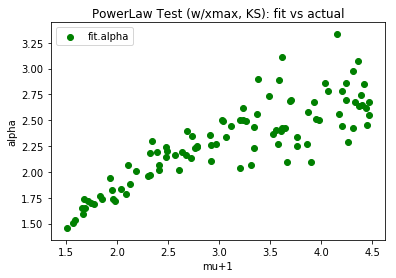

In [9]:
mup1 = np.array(mus)+1.0

plt.scatter(mup1[0:len(data_alphas1k)], data_alphas1k, color='green', label='fit.alpha')
plt.xlabel("mu+1")
plt.ylabel('alpha')
plt.legend()
plt.title("PowerLaw Test (w/xmax, KS): fit vs actual")